<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Jose Antonio Contreras Peña, Marco Antonio Ochoa Cárdenas.

**Fecha:** 12 de octubre del 2021.

**Expediente** :721860 , 720072.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Jancope/ProyectoConjunto_JAContreras_MAOchoa

# Tarea 5: Clase 9

>### <font color ='red'> **Tarea 5** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


In [1]:
# Librerías:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy
import pandas as pd

Código de solución estudiante 1

# 1

In [2]:
# Código de solución estudiante 1
#F(x) despejada x = sin**2((pi*U)/2)
n = 10000
def movbrow(n):
    return np.sin((np.random.rand(n)*np.pi)/2)**2

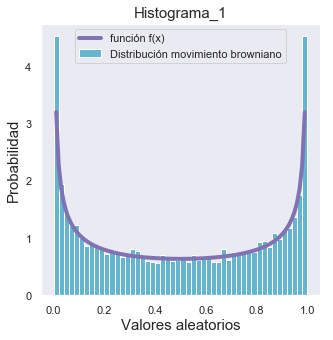

In [3]:
x = np.arange(0.01,1,0.01)
m = movbrow(n)


plt.figure(figsize=(5,5))
plt.title("Histograma_1",fontsize=15)
plt.xlabel('Valores aleatorios',fontsize=15)
plt.ylabel('Probabilidad',fontsize=15)
plt.hist(m,bins=50,density=True,label='Distribución movimiento browniano',color='c')

fx = lambda x: (1)/(np.pi*np.sqrt(1-x)*np.sqrt(x))
plt.plot(x,fx(x),lw=4,label="función f(x)",color='m',ls="-")
plt.legend()
plt.grid()
plt.show()

Despejando F(x) para conocer x e igualando a u (inversa):

$$ u = F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x) = \sin^{-1}(\sqrt x)= \frac{\pi u}{2} \sqrt x = \sin(\frac{\pi u}{2})$$$$\sin^{-1}(\sqrt x)= \sin(\frac{\pi u}{2})$$entonces$$x = \sin^{2}(\frac{\pi u}{2})$$

se deriva:

$$f(x) = \frac{d}{dx}(\frac{2}{\pi}\sin^{-1}(\sqrt x))=\frac{2}{\pi} \frac{d}{dx}(\sin^{-1}(\sqrt x))=\frac{d}{dx}(\frac{2}{\pi}\sin^{-1}(\sqrt x))$$

Respuesta para f(x) :$$f(x)=\frac{1}{\pi\sqrt{1-x}\sqrt{x}}$$

# 2

In [4]:
def Discreta(p_acum, indices, N):
    Ran =np.random.rand(N)
    aleatorios = {i: idx for i, idx in enumerate(indices)}
    #Valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in Ran]).map(aleatorios)
    return y

In [5]:
def Histograma(distribucion,label,densidad=True):
    # Distribucion
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

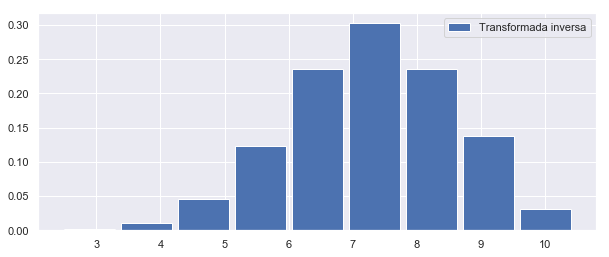

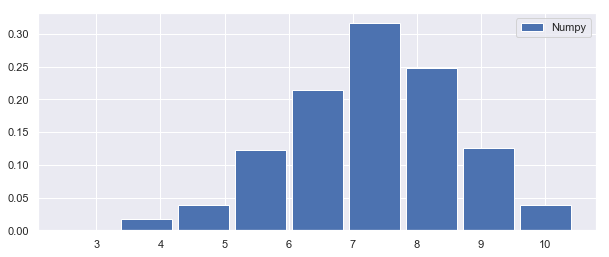

In [6]:
def Acumulada(n,p):
    probabilidad = np.zeros(n)
    probabilidad[0] = (1-p)**n
    def vector(i):
        nonlocal probabilidad
        probabilidad[i+1]=((p/(1-p))*(n-i)/(i+1))*probabilidad[i]     
    [vector(i) for i in range(n-1)]
    return np.cumsum(probabilidad)

n, p, N = 10, 0.7, 1000
acum = Acumulada(n,p)

#Transformada inversa
binom = Discreta(acum, np.arange(0, n+1), N)
Histograma(binom, 'Transformada inversa')

# Usando Numpy
bino_numpy = np.random.binomial(n,p,N)
Histograma(bino_numpy,'Numpy')


# Código de solución estudiante 2

# 1

0.48154215428069863


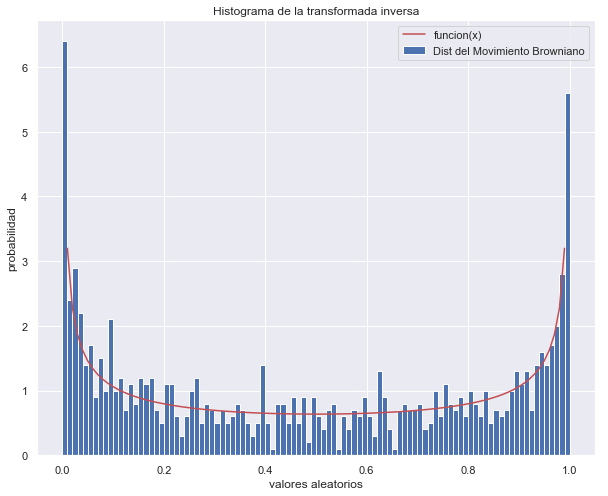

In [7]:
# Crear funcion y grafica 



def brown(N):
    return (np.sin((np.random.random(N)*np.pi)/2))**2
f_x = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))

N = 1000
x = brown(N) 
x_vector = np.arange(0.01,1,0.01)

# Creacion del grafico

plt.figure(figsize=[10,8])
plt.hist(x,bins=100,density=True,color='b',label='Dist del Movimiento Browniano')
plt.plot(x_vector,f_x(x_vector),color='r',label="funcion(x)")
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('Histograma de la transformada inversa')
plt.legend();
print(np.mean(x))
plt.show()

>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

se le aplica funcion inversa y nos resulta:
$$x = \sin^{2} (\frac{U\pi}{2}) $$
Teniendo esta expresion solo nos queda derivar y obtenemos:
$$\frac{dF(X)}{dx}=f(x) = \frac{1}{\pi \sqrt{1-x} \sqrt x}$$

# 2

In [8]:
# Crear las funcion y la funcion a graficar

def dist_binom(a,b):    
    vector = np.zeros(a)
    vector[0] = (1-b)**a 
    def fill_vector(i): 
        nonlocal vector 
        vector[i+1] = ((a-i)/(i+1))*((b)/(1-b))*vector[i] 
    [fill_vector(i) for i in range(a-1)] 
    return np.cumsum(vector)

In [9]:
# Crear una funcion como la vista en clase para generar la distribucion discreta

def distdiscreta(dist_acum,N):
    U =np.random.rand(N)
    v = [sum([1 for b in dist_acum if b < ui ])  for ui in U]
    return v

# formula para plotear las distribucion discreta que generamos
def histograma(distribucion,label):
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

<Figure size 720x576 with 0 Axes>

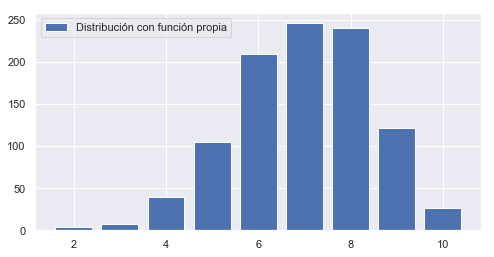

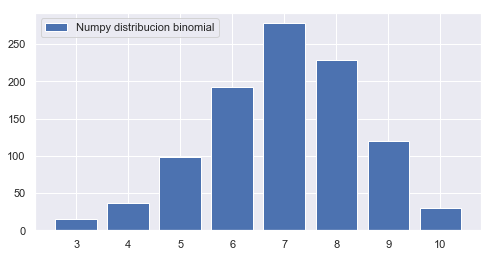

In [10]:
# parametros y variables de las funciones creadas
a,b = 10 ,0.7
dist_acum = dist_binom(a,b) 
N = 1000 
distribucion = distdiscreta(dist_acum,N) 
plt.figure(figsize=[10,8])
histograma(distribucion,"Distribución con función propia")

# Usando numpy
dist_binom_numpy = np.random.binomial(a, b, N)
histograma(dist_binom_numpy, "Numpy distribucion binomial")